In [3]:
import numpy as np
import matplotlib.pyplot as plt
from cv2 import imread, imwrite

In [46]:
# image-картинка в диапозоне от 0до1, kernel_size-размер ядра свертки(12 или 31), n-плотность окружности ядра
def conv(image, kernel_size=11, n=20, blur='Gaussian', k=0.5):
  
    #Функция для определения эффекта Боке
    def func(x,y):
        x = (2*x) / (kernel_size-1)-1     #приводим координаты элементов в диапозону от -1 до 1
        y = (2*y) / (kernel_size-1)-1
        
        x = (x**2 + y**2)**0.5

        def Boke(x, n): 
            if x < 1:
                return (1-x**n)**2
            elif x >= 1:
                return 0
    
        def Gaussian(x, k):  #Модифицированная Гауссина
            if x < 1 and x > -1:
                return np.exp(k*(x**2))/(x**2 - 1)
            else:
                return 0
    
        if blur == 'Boke': return Boke(x, n)
        else: return Gaussian(x, k)


    a3 = np.zeros((kernel_size,kernel_size))     #инициализируем само ядро

    for j in range(kernel_size):        # проходимся по всем элементам и применяем функцию Боке
        for i in range(kernel_size):
            a3[j,i] = func(j,i)

    kernel = a3 * (1/np.sum(a3))   #Делим получившееся ядро на сумму элементов, чтобы сумма была единицей

    h_1, w_1, c_1 = image.shape       #shape image
    h_2, w_2 = kernel.shape           #shape kernel
  
    pad = int((h_2 - 1) / 2)      #значение отступа для каждой стороны
  
    zeros_pad = np.zeros((h_1 + pad*2, w_1 + pad*2, c_1))    # Нулевая матрица с отступом
    zeros_out = np.zeros((h_1, w_1, c_1))       # Нулевая матрица для выходного изображения

    zeros_pad[pad:-pad, pad:-pad] = image    # "Вставляем" изображение в нулевую матрицу с отступом
  


    for k in range(c_1):        # проходимся фильтром(ядром) по каналам изображения
        for j in range(h_1):    # по строкам
            for i in range(w_1):  # по столбцам
                # поэлементное умножение ядра на изображение с последующим сложением
                zeros_out[j,i,k] = np.sum((zeros_pad[j:j+h_2, i:i+w_2, k]) * kernel) 

    return np.uint8(zeros_out * 255) # Возвращает готовое изображение

In [51]:
for i in range(1,3):
    image = imread(f"test{i}.jpg")
    image = conv(image /255, kernel_size=31, k=1)
    imwrite(f"out{i}.jpg",image)

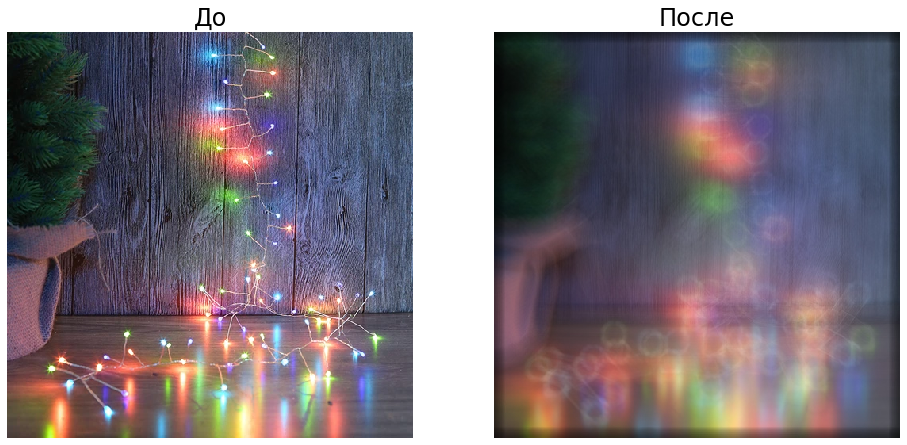

In [52]:
plt.figure(figsize=(16,16))

plt.subplot(1,2,1)
plt.axis('off')
plt.title('До', fontsize=24)
plt.imshow(imread("test1.jpg"))

plt.subplot(1,2,2)
plt.axis('off')
plt.title('После', fontsize=24)
plt.imshow(imread("out1.jpg"))